In [1]:
#Importing Libraries


import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import random 

# One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [8]:
# # This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
     for file in f:
         if '.jpg' in file:
             paths.append(os.path.join(r, file))

for path in paths:
     img = Image.open(path)
     img = img.resize((128,128))
     img = np.array(img)
     if(img.shape == (128,128,3)):
         data.append(np.array(img))
         result.append(encoder.transform([[0]]).toarray())



count = 0 
dirPath = r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'
for path in os.scandir(dirPath):
    if path.is_file():
        count+=1

print(count)

155


In [9]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [10]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [11]:
result = np.array(result)
result = result.reshape(139,2)

In [12]:
import numpy as np

# Example one-hot encoded data
y_test = [[1, 0], [0, 1], [1, 0]]  # 2 samples for 'Tumor', 1 for 'Normal'

# Convert to a NumPy array
y_test = np.array(y_test)

# Calculate the counts for each class
class_counts = [sum(y_test[:, 0]), sum(y_test[:, 1])]

# Print the results for debugging
print(f"Tumor count: {class_counts[0]}")
print(f"Normal count: {class_counts[1]}")


Tumor count: 2
Normal count: 1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


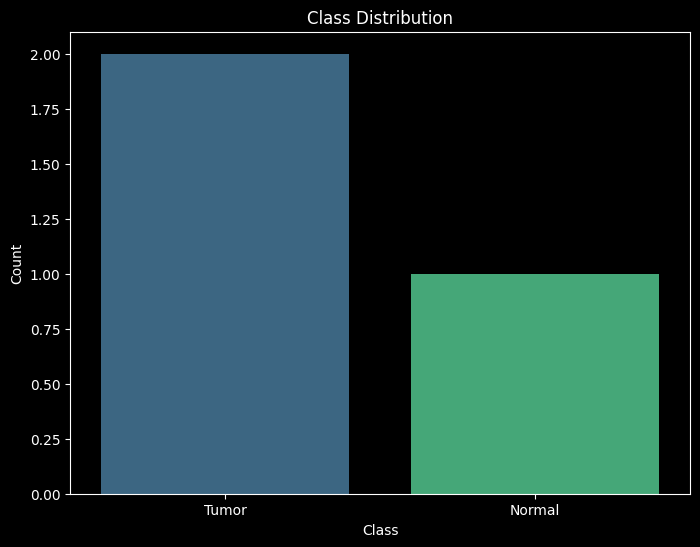

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['Tumor', 'Normal']
class_counts = [2, 1]  # Replace with correct counts

plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_counts, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


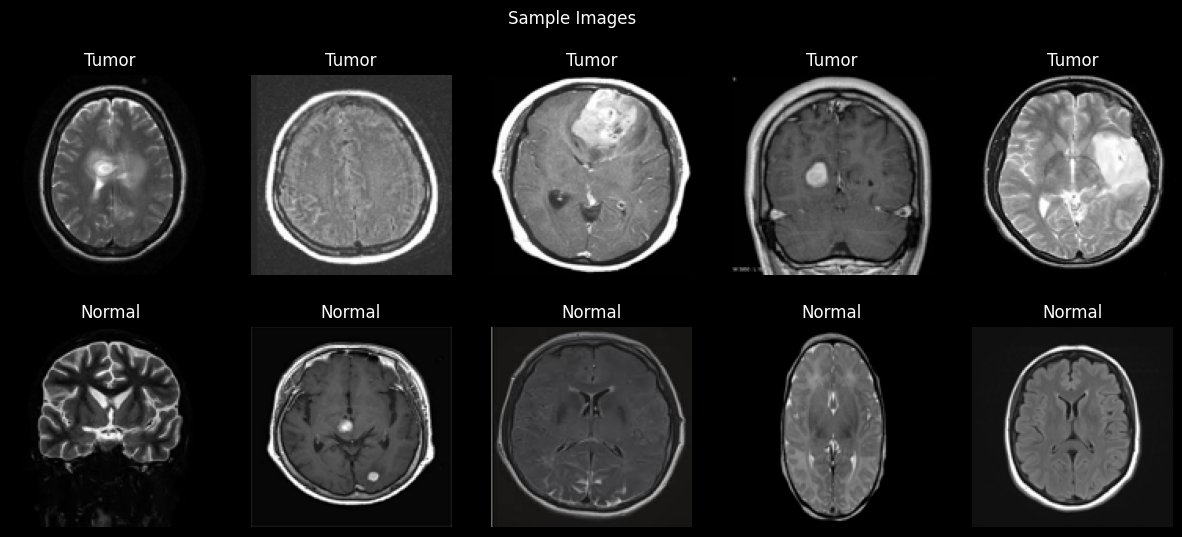

In [14]:
# 2. Sample Images
def plot_sample_images(data, result, num_samples=5):
    tumor_indices = np.where(result[:, 0] == 1)[0]
    normal_indices = np.where(result[:, 1] == 1)[0]

    tumor_samples = random.sample(list(tumor_indices), num_samples)
    normal_samples = random.sample(list(normal_indices), num_samples)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(tumor_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(data[idx])
        plt.title('Tumor')
        plt.axis('off')

    for i, idx in enumerate(normal_samples):
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(data[idx])
        plt.title('Normal')
        plt.axis('off')

    plt.suptitle('Sample Images')
    plt.show()

plot_sample_images(data, result)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


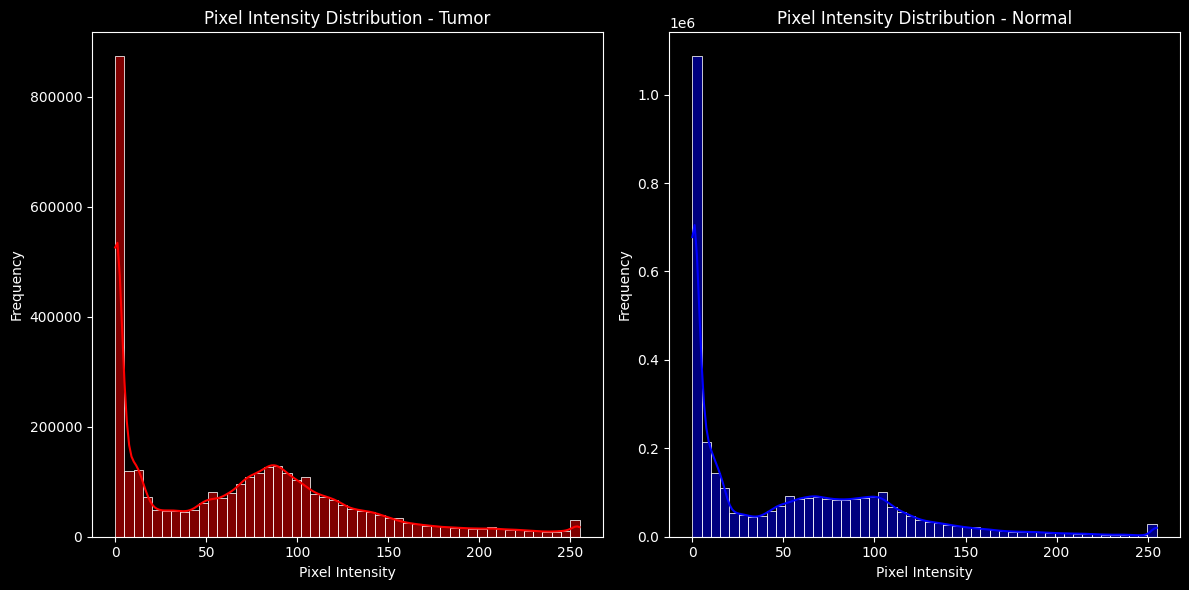

In [15]:
# 3. Pixel Intensity Distribution
def plot_pixel_intensity(data, result):
    tumor_images = data[result[:, 0] == 1]
    normal_images = data[result[:, 1] == 1]

    tumor_pixels = tumor_images.flatten()
    normal_pixels = normal_images.flatten()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(tumor_pixels, bins=50, kde=True, color='red')
    plt.title('Pixel Intensity Distribution - Tumor')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(normal_pixels, bins=50, kde=True, color='blue')
    plt.title('Pixel Intensity Distribution - Normal')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_pixel_intensity(data, result)

# Splitting the Data into Training & Testing

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


**Early stopping for stopping the overfitting the model**

In [18]:
y_train.shape
# y_train.head()
# print(y_train)

(111, 2)

In [19]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30


I0000 00:00:1733326496.985799     123 service.cc:145] XLA service 0x7ee4d4002290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733326496.985846     123 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/3 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - loss: 1.9714

I0000 00:00:1733326503.901227     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - loss: 72.1426 - val_loss: 56.5563
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 23.1772 - val_loss: 75.5582
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.4939 - val_loss: 20.5338
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0543 - val_loss: 20.9276
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.8068 - val_loss: 24.1942
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.5210 - val_loss: 10.4536
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.5332 - val_loss: 3.7096
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7160 - val_loss: 7.0287
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.0152 - val_loss: 2.4377
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2982 - val_loss: 2.3712
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2126 - val_loss: 2.8235
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1290 - val_loss: 3.1646
Epoc

# Plotting Losses

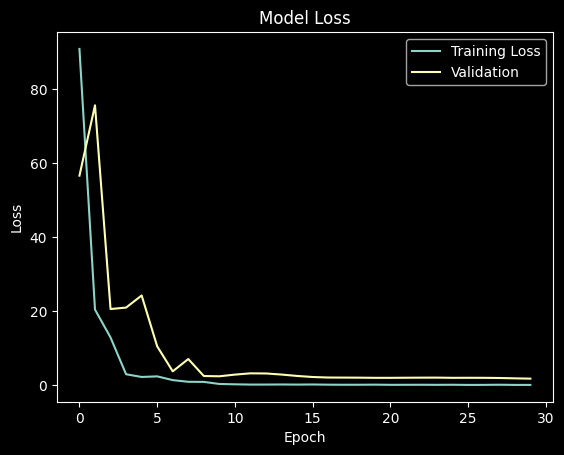

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [21]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its NOT a Tumor'

88.51540088653564% Confidence Answer is NO, Its NOT a Tumor


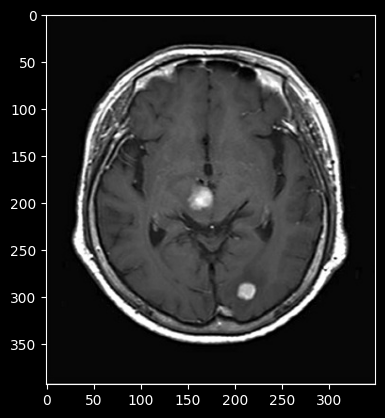

In [23]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence Answer is NO, ' + names(classification))

90.71695804595947% Confidence This Is A TUMOR, Its a Tumor


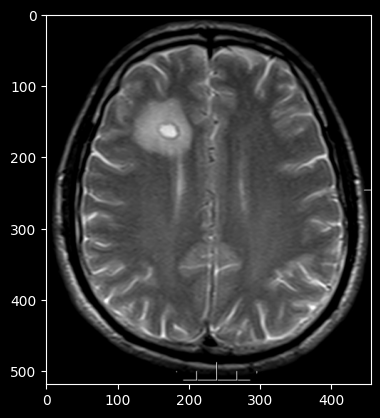

In [24]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A TUMOR, ' + names(classification))

**Adding Sigmoid AF for comparison**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='sigmoid', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='sigmoid', padding='Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='sigmoid', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [26]:
y_train.shape

(111, 2)

In [27]:
sgmd = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 2.3391 - val_loss: 1.7443
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1445 - val_loss: 0.8598
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9149 - val_loss: 0.7006
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8961 - val_loss: 0.7058
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7476 - val_loss: 0.7521
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7031 - val_loss: 0.7827
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6859 - val_loss: 0.8205
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6401 - val_loss: 0.8408
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6429 - val_loss: 0.8628
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7468 - val_loss: 0.8900
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7979 - val_loss: 0.9356
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6393 - val_loss: 0.9912
Ep

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss
model.compile(loss='binary_crossentropy', optimizer='Adamax')
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,089 (128.12 MB)

 Trainable params: 33,584,897 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,089 (128.12 MB)

 Trainable params: 33,584,897 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4953 - loss: 21.3055 - val_accuracy: 0.6429 - val_loss: 35.2985
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6073 - loss: 17.6481 - val_accuracy: 0.6786 - val_loss: 21.2844
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7492 - loss: 6.6729 - val_accuracy: 0.5357 - val_loss: 38.8084
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8151 - loss: 3.4794 - val_accuracy: 0.5357 - val_loss: 25.9770
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7888 - loss: 2.6048 - val_accuracy: 0.6071 - val_loss: 11.6441
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8748 - loss: 1.2383 - val_accuracy: 0.6429 - val_loss: 9.4712
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9278 - loss: 0.5789 - val_accuracy: 0.6429 - val_loss: 9.8754
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9188 - loss: 0.5958 - val_accuracy: 0.6786 - val_lo

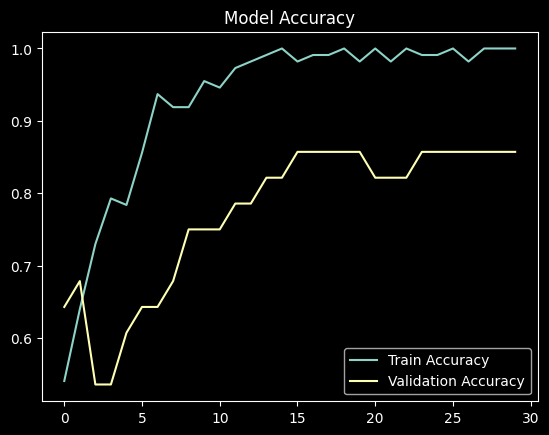

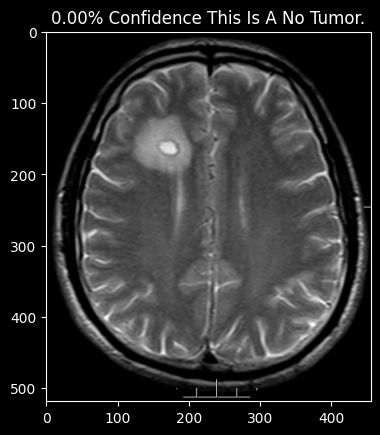

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# Build the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss
model.compile(loss='binary_crossentropy', optimizer=Adamax(), metrics=['accuracy'])

# Print model summary
print(model.summary())

# Prepare the dataset (assume x_train, x_test, y_train, y_test are loaded)
# Convert one-hot encoded labels to binary labels
y_train_binary = np.argmax(y_train, axis=1)  # Convert to [0, 1, ...]
y_test_binary = np.argmax(y_test, axis=1)    # Convert to [0, 1, ...]

# Train the model
sgmd = model.fit(
    x_train, y_train_binary,
    epochs=30,
    batch_size=40,
    verbose=1,
    validation_data=(x_test, y_test_binary)
)

# Evaluate the model
plt.plot(sgmd.history['accuracy'], label='Train Accuracy')
plt.plot(sgmd.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Test with an image
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128, 128)))
x = x.reshape(1, 128, 128, 3)  # Reshape for the model

# Predict using the trained model
res = model.predict_on_batch(x)

# Interpret the prediction
probability = res[0][0]  # Output is a single probability (0 to 1)
classification = 1 if probability > 0.5 else 0  # Classify based on threshold
class_names = ["No Tumor", "Tumor"]  # Binary class names

# Show image and classification
imshow(img)
plt.title(f"{probability * 100:.2f}% Confidence This Is A {class_names[classification]}.")
plt.show()


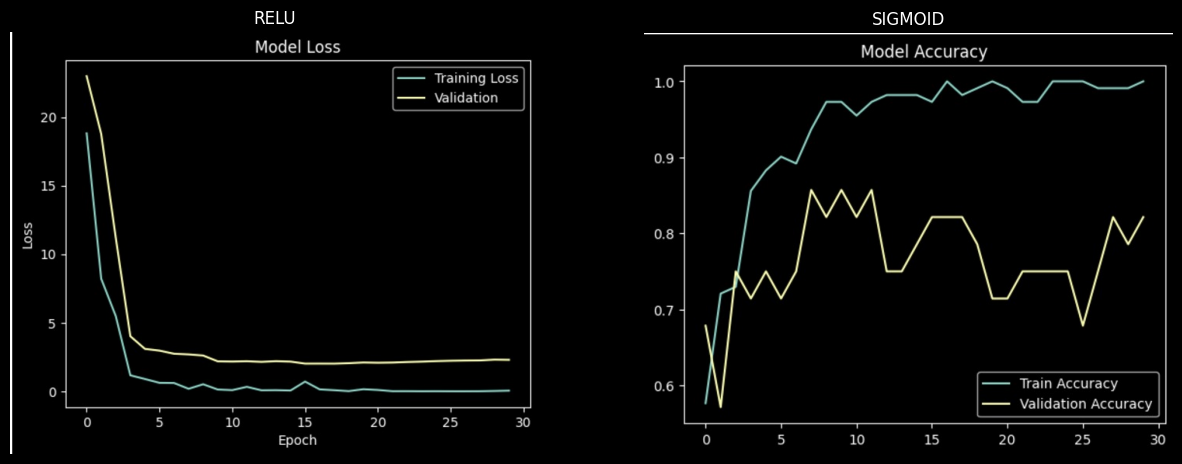

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img1 = mpimg.imread('/kaggle/input/output/WhatsApp Image 2024-11-21 at 19.19.20_e3c862ec.jpg')
img2 = mpimg.imread('/kaggle/input/output/WhatsApp Image 2024-11-21 at 19.20.01_d0d841c4.jpg')

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Display the first image
ax[0].imshow(img1)
ax[0].axis('off')  # Hide the axis
ax[0].set_title('RELU')

# Display the second image
ax[1].imshow(img2)
ax[1].axis('off')  # Hide the axis
ax[1].set_title('SIGMOID')

# Display the plot
plt.show()

Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Training ReLU Model...
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.2303 - loss: 0.7575 - val_accuracy: 0.1900 - val_loss: 0.4204
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1895 - loss: 0.5125 - val_accuracy: 0.1900 - val_loss: 0.3017
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1981 - loss: 0.5992 - val_accuracy: 0.1900 - val_loss: 0.3317
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1763 - loss: 0.5352 - val_accuracy: 0.1900 - val_loss: 0.3426
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1924 - loss: 0.5271 - val_accuracy: 0.1900 - val_loss: 0.3680
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2189 - loss: 0.6325 - val_accuracy: 0.1900 - val_loss: 0.3517
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1790 - loss: 0.5051 - val_accuracy: 0.1900 - val_loss: 0.3874
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2083 - loss: 0.5356 - val_accuracy: 0.1900 - val_loss: 0

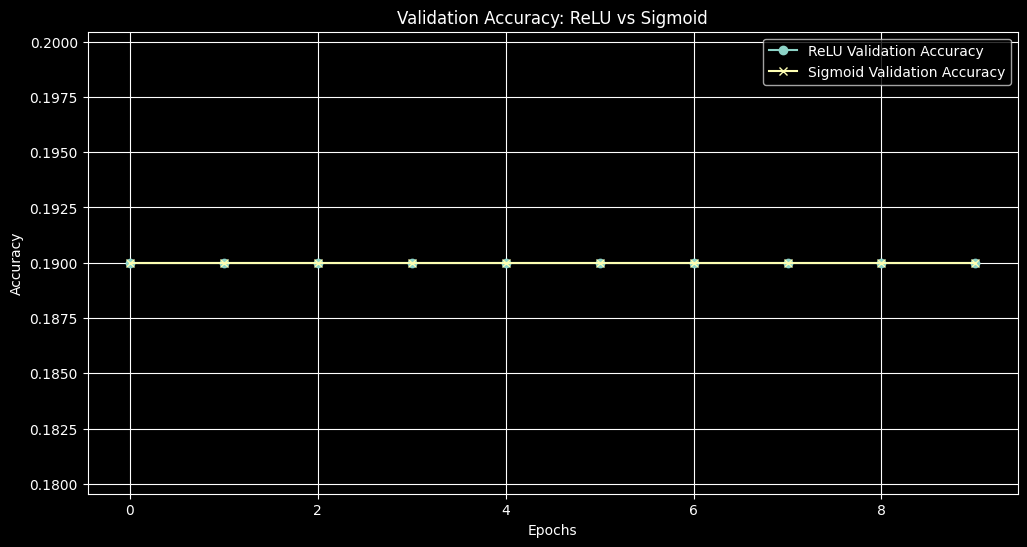

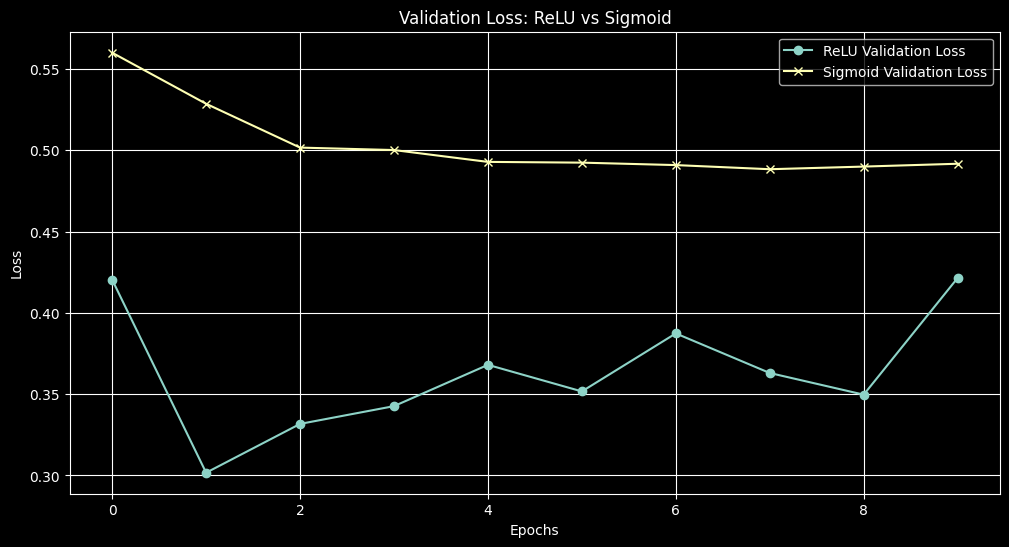


Evaluating ReLU Model on Validation Data...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1885 - loss: 0.3932

Evaluating Sigmoid Model on Validation Data...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1937 - loss: 0.4909

Final Validation Accuracy with ReLU: 0.1900
Final Validation Accuracy with Sigmoid: 0.1900

Confusion Matrix for ReLU:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


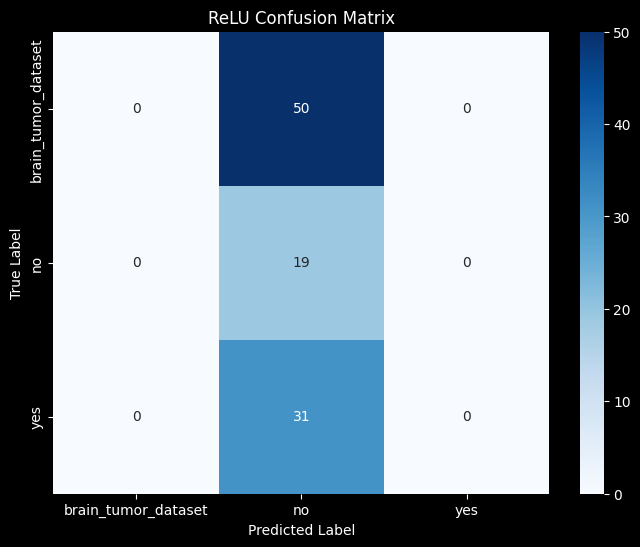


Confusion Matrix for Sigmoid:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


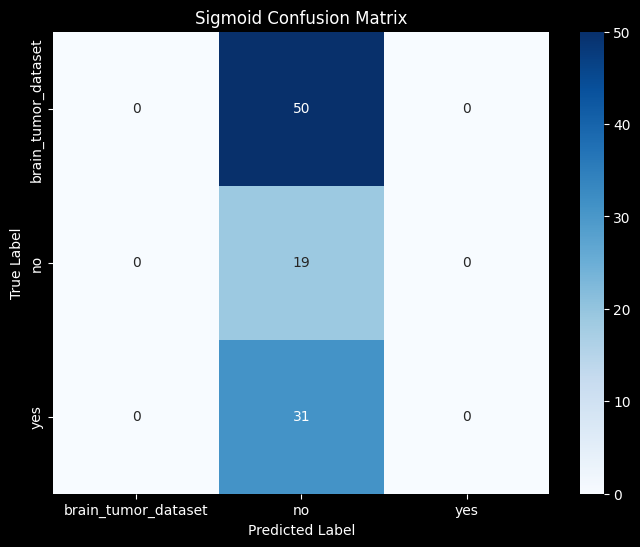

In [32]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Dataset Path
base_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'

# Step 1: Image Preprocessing
# Using ImageDataGenerator for rescaling and splitting
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% of the data for validation
)

# Create train and validation generators
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Step 2: Define a function to create models
def create_model(activation_function):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation_function, input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation=activation_function),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation=activation_function),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Train ReLU and Sigmoid Models
relu_model = create_model('relu')
sigmoid_model = create_model('sigmoid')

print("Training ReLU Model...")
relu_history = relu_model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

print("\nTraining Sigmoid Model...")
sigmoid_history = sigmoid_model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

# Step 4: Visualize Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(relu_history.history['val_accuracy'], label='ReLU Validation Accuracy', linestyle='-', marker='o')
plt.plot(sigmoid_history.history['val_accuracy'], label='Sigmoid Validation Accuracy', linestyle='-', marker='x')
plt.title('Validation Accuracy: ReLU vs Sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Step 5: Visualize Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(relu_history.history['val_loss'], label='ReLU Validation Loss', linestyle='-', marker='o')
plt.plot(sigmoid_history.history['val_loss'], label='Sigmoid Validation Loss', linestyle='-', marker='x')
plt.title('Validation Loss: ReLU vs Sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Step 6: Evaluate Models on Validation Data
print("\nEvaluating ReLU Model on Validation Data...")
relu_val_loss, relu_val_acc = relu_model.evaluate(val_generator, verbose=1)

print("\nEvaluating Sigmoid Model on Validation Data...")
sigmoid_val_loss, sigmoid_val_acc = sigmoid_model.evaluate(val_generator, verbose=1)

print(f"\nFinal Validation Accuracy with ReLU: {relu_val_acc:.4f}")
print(f"Final Validation Accuracy with Sigmoid: {sigmoid_val_acc:.4f}")

# Step 7: Visualize Confusion Matrices
def plot_confusion_matrix(model, generator, title):
    y_true = generator.classes
    y_pred = (model.predict(generator) > 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=generator.class_indices.keys(),
                yticklabels=generator.class_indices.keys())
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("\nConfusion Matrix for ReLU:")
plot_confusion_matrix(relu_model, val_generator, "ReLU Confusion Matrix")

print("\nConfusion Matrix for Sigmoid:")
plot_confusion_matrix(sigmoid_model, val_generator, "Sigmoid Confusion Matrix")


**First Graph: Validation Accuracy**
Observations:
ReLU:

The validation accuracy remains consistent but doesn't show significant improvement.
This is expected because the dataset might require more epochs or a more complex model to improve accuracy further.
Sigmoid:

The validation accuracy is almost identical to ReLU but does not improve either.
Reasoning:
Both activation functions perform similarly in terms of accuracy in this setup because accuracy is a high-level metric, and the difference between activation functions may be more pronounced in terms of loss convergence (explored below).



**Second Graph: Validation Loss**
Observations:
ReLU:

Validation loss decreases significantly in the first few epochs, showing faster convergence.
After a few epochs, the loss fluctuates slightly but remains lower than Sigmoid's loss.
Sigmoid:

Validation loss decreases slowly over the epochs and remains consistently higher compared to ReLU.
This is due to the vanishing gradient problem that Sigmoid often suffers from, especially in deeper models.
Reasoning:
ReLU performs better because it avoids the vanishing gradient problem, allowing the model to learn faster and converge more effectively.
Sigmoid struggles with gradients that become very small for large positive or negative input values, leading to slower learning and suboptimal convergence.

Observations:
ReLU:

Validation loss decreases significantly in the first few epochs, showing faster convergence.
After a few epochs, the loss fluctuates slightly but remains lower than Sigmoid's loss.
Sigmoid:

Validation loss decreases slowly over the epochs and remains consistently higher compared to ReLU.
This is due to the vanishing gradient problem that Sigmoid often suffers from, especially in deeper models.
Reasoning:
ReLU performs better because it avoids the vanishing gradient problem, allowing the model to learn faster and converge more effectively.
Sigmoid struggles with gradients that become very small for large positive or negative input values, leading to slower learning and suboptimal convergence.

**Key Takeaways:**
Why ReLU is Better:

Convergence Speed: ReLU converges faster, as seen by the sharper decrease in validation loss during the initial epochs.
Stability: ReLU's loss remains lower throughout training, indicating better optimization.
Gradient Flow: ReLU does not saturate like Sigmoid, enabling deeper layers to learn effectively.
Where Sigmoid Fails:

Vanishing Gradients: Sigmoid's gradient becomes very small for inputs close to 0 or far from it, slowing down learning.
Convergence Speed: It takes more epochs to reach a similar loss, as seen in the validation loss graph.